In [1]:
from scipy.io import FortranFile as ff
import numpy as np
#np.set_printoptions(threshold=50)
import math
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm

In [2]:
#Read the initial rays, to get the weights (computed based on the luminosity of the stars)
IC_file = '/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/CD/IC_CD_Si_1258_1262'
f = ff(IC_file,'r')
nrays = f.read_ints()[0]
f.read_reals()
weights = f.read_reals()
f.close()

In [3]:
print(nrays)
print(weights)

900185
[7.70385724e+44 7.20216520e+44 5.29629641e+44 ... 2.14624175e+45
 1.10723663e+45 3.41024294e+45]


In [4]:
#Read the initial rays, to get the weights (computed based on the luminosity of the stars)
IC_H_file = '/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/CD/IC_CD_H_900_910'
f = ff(IC_H_file,'r')
nrays_H = f.read_ints()[0]
f.read_reals()
weights_H = f.read_reals()
f.close()

In [5]:
print(nrays_H)
print(weights_H)

900185
[4.82706856e+43 2.70342955e+43 1.38734420e+43 ... 3.76948267e+43
 8.68375712e+43 8.68307266e+43]


In [6]:
#Read the output
output_CD_file = '/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/CD/output_CD_Si_1258_1262_1'
f = ff(output_CD_file,'r')
nrays = f.read_ints()[0]
ndirections = f.read_ints()[0]
nGas = f.read_ints()[0]
vmin, vmax = f.read_reals()
nBins = f.read_ints()[0]
dv = (vmax-vmin)/nBins
v = np.linspace(vmin - dv/2, vmax + dv/2, nBins+2)

In [7]:
f.close()

In [8]:
print(ndirections, nGas, vmin, vmax, nBins)

5 2 -500.0 500.0 40


In [9]:
#Read the output
output_CD_H_file = '/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/CD/output_CD_H_900_910_1'

In [10]:
#Define the directions 
directions = np.zeros((5,3))
directions[0,:] = [0.5, -0.866, 0.00]
directions[1,:] = [0.45, -0.78, 0.44]
directions[2,:] = [0.78, 0.45, 0.44]
directions[3,:] = [0.72, 0.181, -0.67]
directions[4,:] = [-0.48, -0.2, 0.85]

In [11]:
colors = ['blue','green','orange','purple']

In [12]:
# f = ff(output_CD_file,'r')
# nrays = f.read_ints()[0]
# ndirections = f.read_ints()[0]
# nGas = f.read_ints()[0]
# vmin, vmax = f.read_reals()
# nBins = f.read_ints()[0]
# skip = 0
# for k in range(skip):
#     f.read_reals()
    
# #SiII column density :

# fig2, ax2 = plt.subplots(figsize=(8, 8))
# n_bins=1000
# for k in range(4):#ndirections):

#     CD = f.read_reals()
#     #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
#     CD2 = CD.reshape((nBins+2,nrays))

#     #To do the cumulative plot
#     CD_tot_per_part = np.sum(CD2,axis=0)
    
#     n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights, density=True, \
#         histtype='step', cumulative=-1, \
#         #label='direction %05.4f %05.4f %05.4f'%(directions[k+skip,0],directions[k+skip,1],directions[k+skip,2]), \
#                                 linewidth=2, color=colors[k])
    
# #To do the cumulative plot
# ax2.grid(which='both')
# ax2.grid(which='minor', alpha=0.5)
# #ax.set_xticks(minor_ticks_x, minor=True)
# #ax.set_yticks(minor_ticks_y, minor=True)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# ax2.set_xlim(10,19)
# ax2.set_ylim(0.9,1.0)
# ax2.axvline(11.15,color='black',linestyle='--', label = r'$\tau_{1260} \sim 1$')
# ax2.axvline(11.85,color='black',linestyle='--', label = r'$\tau_{1260} \sim 5$')
# ax2.set_title('Column densities from stars to observer', fontsize=24)
# ax2.set_xlabel(r'Log( Column density of SiII $[\mathrm{cm}^{-2}]$ )', fontsize=24)
# ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
# ax2.legend(loc='lower center',fontsize=24)
# plt.savefig('/home/cral/mauerhofer/figures/paper/CD/histo_cumul_Si_107.pdf')
# plt.show()
# plt.close()

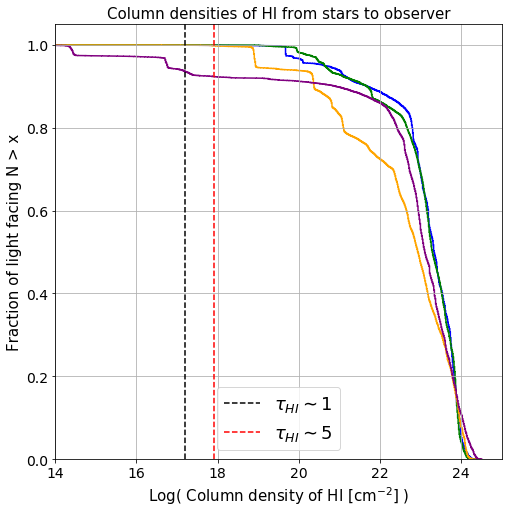

In [24]:
f = ff(output_CD_H_file,'r')
nrays = f.read_ints()[0]
ndirections = f.read_ints()[0]
nGas = f.read_ints()[0]
vmin, vmax = f.read_reals()
nBins = f.read_ints()[0]
skip = 0
for k in range(skip):
    f.read_reals()
    
#HI column density :

fig2, ax2 = plt.subplots(figsize=(8, 8))
n_bins=1000
for k in range(4):#ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights_H, density=True, \
        histtype='step', cumulative=-1, \
        #label='direction %05.4f %05.4f %05.4f'%(directions[k+skip,0],directions[k+skip,1],directions[k+skip,2]), \
                                linewidth=1.5, color=colors[k])
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(14,25)
# ax2.set_ylim(0.8,1.0)
ax2.axvline(17.2,color='black',linestyle='--', label = r'$\tau_{HI} \sim 1$')
ax2.axvline(17.9,color='red',linestyle='--', label = r'$\tau_{HI} \sim 5$')
ax2.set_title('Column densities of HI from stars to observer', fontsize=15)
ax2.set_xlabel(r'Log( Column density of HI $[\mathrm{cm}^{-2}]$ )', fontsize=15)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=15)
ax2.legend(loc='lower center',fontsize=18)
plt.savefig('/home/cral/mauerhofer/figures/paper/CD/histo_cumul_HI_107.pdf')
plt.show()
plt.close()
f.close()

#WITH DUST

In [15]:
dust_file = '/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/CD/output_CD_Si_1258_1262_2'
f = ff(dust_file,'r')
CD_dust = np.zeros((ndirections,nrays))
f.read_ints()
f.read_ints()
f.read_ints()
f.read_reals()
f.read_ints()
for k in range(ndirections):
    CD = f.read_reals()
    CD2 = CD.reshape((nBins+2,nrays))
    CD_dust[k,:] = np.sum(CD2,axis=0)

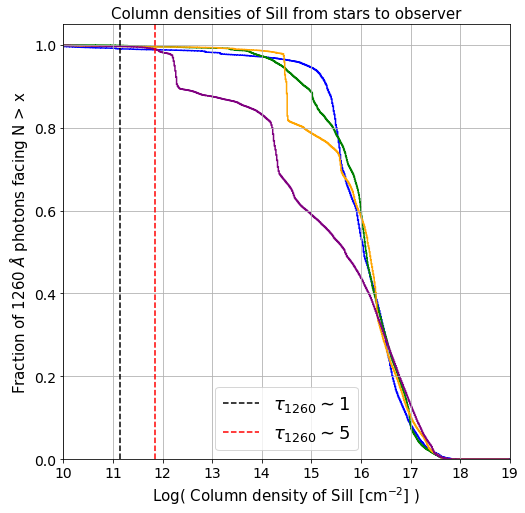

In [25]:
f = ff(output_CD_file,'r')
nrays = f.read_ints()[0]
ndirections = f.read_ints()[0]
nGas = f.read_ints()[0]
vmin, vmax = f.read_reals()
nBins = f.read_ints()[0]
skip = 0
for k in range(skip):
    f.read_reals()
    
#SiII column density :

fig2, ax2 = plt.subplots(figsize=(8, 8))
n_bins=1000
for k in range(4):#ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    
    #Dust attenuation
    weights_dust = weights*np.exp(-6.93e-23*CD_dust[k,:])
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights_dust, density=True, \
        histtype='step', cumulative=-1, \
        #label='direction %05.4f %05.4f %05.4f'%(directions[k+skip,0],directions[k+skip,1],directions[k+skip,2]), \
                                linewidth=1.5, color=colors[k])
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(10,19)
# ax2.set_ylim(0.9,1.0)
ax2.axvline(11.15,color='black',linestyle='--', label = r'$\tau_{1260} \sim 1$')
ax2.axvline(11.85,color='red',linestyle='--', label = r'$\tau_{1260} \sim 5$')
ax2.set_title('Column densities of SiII from stars to observer', fontsize=15)
ax2.set_xlabel(r'Log( Column density of SiII $[\mathrm{cm}^{-2}]$ )', fontsize=15)
ax2.set_ylabel(r'Fraction of 1260 $\AA$ photons facing N > x', fontsize=15)
ax2.legend(loc='lower center',fontsize=18)
plt.savefig('/home/cral/mauerhofer/figures/paper/CD/histo_cumul_Si_dust_107.pdf')
plt.show()
plt.close()

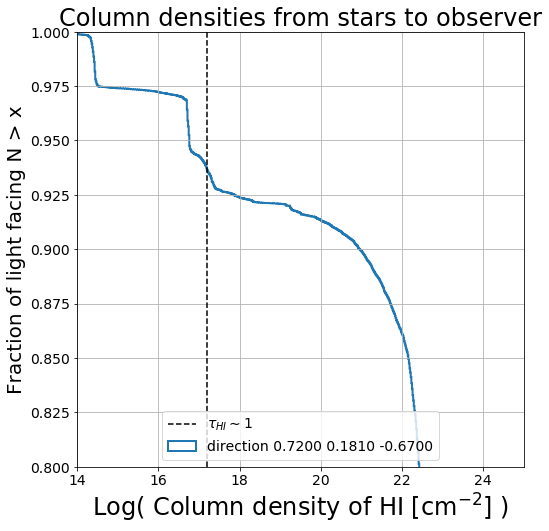

In [82]:
f = ff(output_CD_H_file_2,'r')
nrays = f.read_ints()[0]
ndirections = f.read_ints()[0]
nGas = f.read_ints()[0]
vmin, vmax = f.read_reals()
nBins = f.read_ints()[0]
skip = 3
for k in range(skip):
    f.read_reals()
    
#HI column density :

fig2, ax2 = plt.subplots(figsize=(8, 8))
n_bins=1000
for k in range(1):#ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights_H_2, density=True, \
        histtype='step', cumulative=-1, \
        label='direction %05.4f %05.4f %05.4f'%(directions[k+skip,0],directions[k+skip,1],directions[k+skip,2]), \
                                linewidth=2)
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(14,25)
ax2.set_ylim(0.8,1.0)
ax2.axvline(17.2,color='black',linestyle='--', label = r'$\tau_{HI} \sim 1$')
ax2.set_title('Column densities from stars to observer', fontsize=24)
ax2.set_xlabel(r'Log( Column density of HI $[\mathrm{cm}^{-2}]$ )', fontsize=24)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
ax2.legend(loc='lower center',fontsize=14)
plt.savefig('/home/cral/mauerhofer/figures/paper/CD/histo_cumul_HI_107.pdf')
plt.show()
plt.close()
f.close()

In [9]:
print(CD_tot_per_part.shape)
CD_dust = np.zeros((ndirections,nrays))
print(CD_dust.shape)

(1510021,)
(6, 1510021)


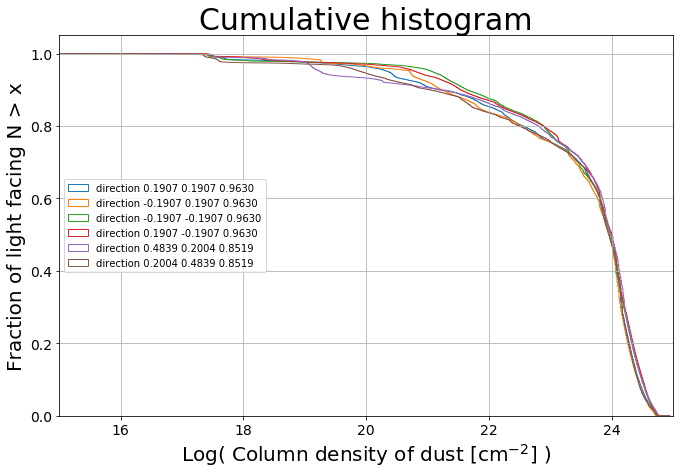

In [10]:
#dust column density :
fig2, ax2 = plt.subplots(figsize=(11, 7))
n_bins=1000
for k in range(ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    CD_dust[k,:] = CD_tot_per_part
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights, density=True, histtype='step', cumulative=-1, label='direction %05.4f %05.4f %05.4f'%(directions[k,0],directions[k,1],directions[k,2]))
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
ax2.legend(loc='center left')#,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(15,25)
#ax2.set_ylim(0.9,1.0)
ax2.set_title('Cumulative histogram', fontsize=30)
ax2.set_xlabel(r'Log( Column density of dust $[\mathrm{cm}^{-2}]$ )', fontsize=20)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
#plt.savefig('/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/OI_SiII/CD/Halo1/histo_cumul_Si_%i.png'%k)
plt.show()
plt.close()
f.close()

In [15]:
tau_dust = 6.14e-23*CD_dust
weight = np.exp(-tau_dust)

In [33]:
print(weight.shape)
print(weight[1,100000:100010])
small = np.where(weight[0,:]<0.000001)[0]
print(small.shape)

(6, 1510021)
[0.98747067 0.97206491 0.97224225 0.9987699  0.90879308 0.91631688
 0.99918209 0.99944228 0.99595846 0.95409468]
(975087,)


In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']
